In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [4]:
conn = sqlite3.connect("dta.sqlite")
data = pd.read_sql_query("SELECT * FROM Fires;",conn)

In [5]:
data.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [6]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [7]:
print(data.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ...   LATITUDE  \
0                  0511     Plumas National Forest  ...  40.0369

In [8]:
data['Day of the Week'] = data['DATE'].dt.day_name()
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month

In [9]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DATE,Day of the Week,MONTH
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,Wednesday,2
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,Wednesday,5
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,Monday,5
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-06-28,Monday,6
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-06-28,Monday,6


In [10]:
data = data.drop(columns=['Shape','OBJECTID','FOD_ID'])

In [11]:
data.head()

,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,...,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DATE,Day of the Week,MONTH
0,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,...,-121.005833,5.0,USFS,CA,63,063,Plumas,2005-02-02,Wednesday,2
1,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,...,-120.404444,5.0,USFS,CA,61,061,Placer,2004-05-12,Wednesday,5
2,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,...,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,2004-05-31,Monday,5
3,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,...,-119.913333,5.0,USFS,CA,3,003,Alpine,2004-06-28,Monday,6
4,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,...,-119.933056,5.0,USFS,CA,3,003,Alpine,2004-06-28,Monday,6


Let us Convert the dates into Day of week so that we can see what days have most fire cases reported

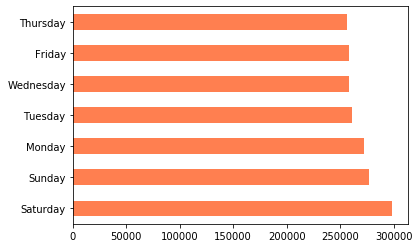

In [12]:
data['Day of the Week'].value_counts().plot(kind='barh',color='coral')
plt.show()

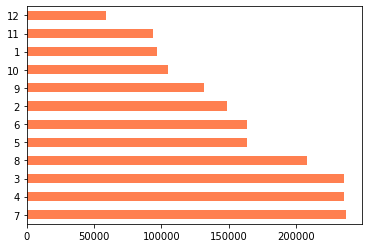

In [13]:
data['MONTH'].value_counts().plot(kind='barh',color='coral')
plt.show()

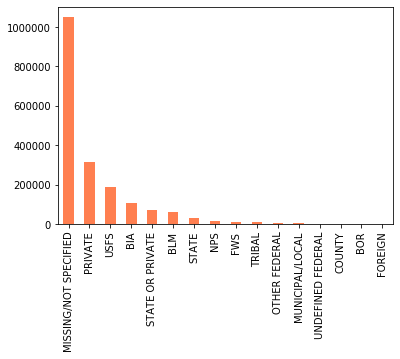

In [14]:
data['OWNER_DESCR'].value_counts().plot(kind='bar',color='coral')
plt.show()

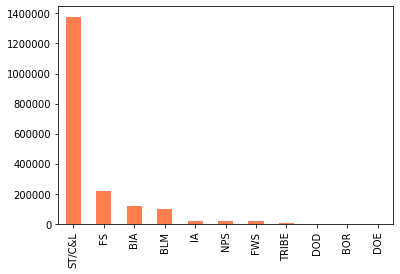

In [15]:
data['NWCG_REPORTING_AGENCY'].value_counts().plot(kind='bar',color='coral')
plt.show()

Just for the knowlege of where all the fires have been reported let us create a map using longitude and latitude attributes

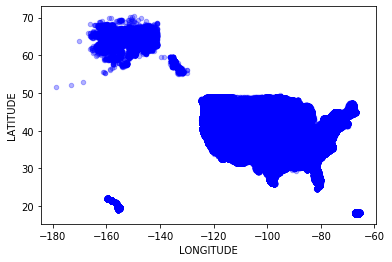

In [16]:
data.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='blue',alpha=0.3)
plt.show()

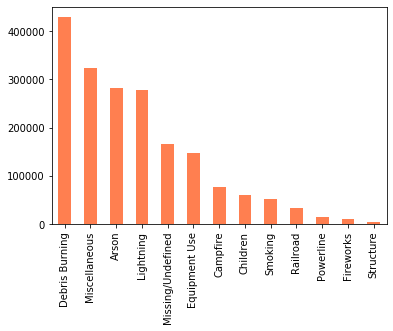

In [17]:
data['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='coral')
plt.show()

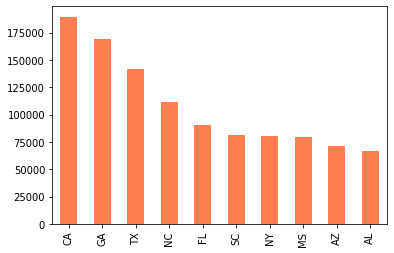

In [18]:
data['STATE'].value_counts().head(n=10).plot(kind='bar',color='coral')
plt.show()

We can see that three States Texas(TX),Georgia(GA),California(CA) have the highest numbers wildfires so we will focus on those states.

In [19]:
GA = data[data['STATE']=='GA']
TX = data[data['STATE']=='TX']
CA = data[data['STATE']=='CA']

Let us see the causes of wildfires in particular states.

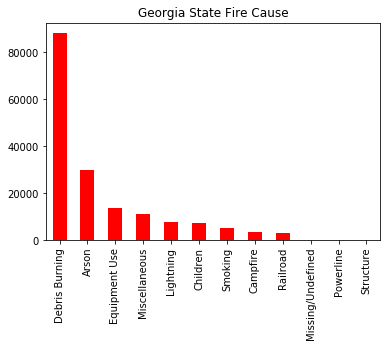

In [20]:
GA['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='red',title='Georgia State Fire Cause')
plt.show()

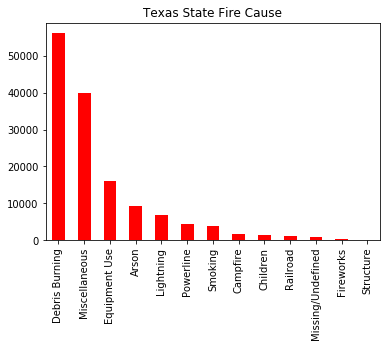

In [21]:
TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='red',title='Texas State Fire Cause')
plt.show()

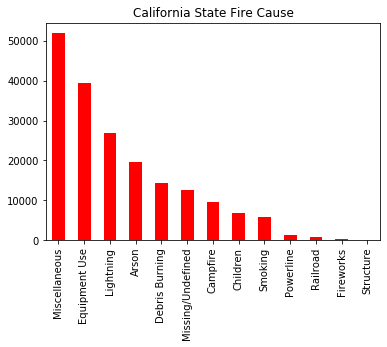

In [22]:
CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='red',title='California State Fire Cause')
plt.show()

Lets prepare data into numerical using Label Encoder so that we can use it in our Model

In [23]:
Encoder = preprocessing.LabelEncoder()
data['STAT_CAUSE_DESCR'] = Encoder.fit_transform(data['STAT_CAUSE_DESCR'])
data['STATE'] = Encoder.fit_transform(data['STATE'])
data['DAY_OF_WEEK'] = Encoder.fit_transform(data['Day of the Week'])
data['FPA_ID'] = Encoder.fit_transform(data['Day of the Week'])
print(data.head())

   FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM NWCG_REPORTING_AGENCY  \
0       6                FED   FS-FIRESTAT                    FS   
1       6                FED   FS-FIRESTAT                    FS   
2       1                FED   FS-FIRESTAT                    FS   
3       1                FED   FS-FIRESTAT                    FS   
4       1                FED   FS-FIRESTAT                    FS   

  NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                USCAPNF    Plumas National Forest                  0511   
1                USCAENF  Eldorado National Forest                  0503   
2                USCAENF  Eldorado National Forest                  0503   
3                USCAENF  Eldorado National Forest                  0503   
4                USCAENF  Eldorado National Forest                  0503   

  SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID LOCAL_INCIDENT_ID  ...  \
0     Plumas National Forest                    1         

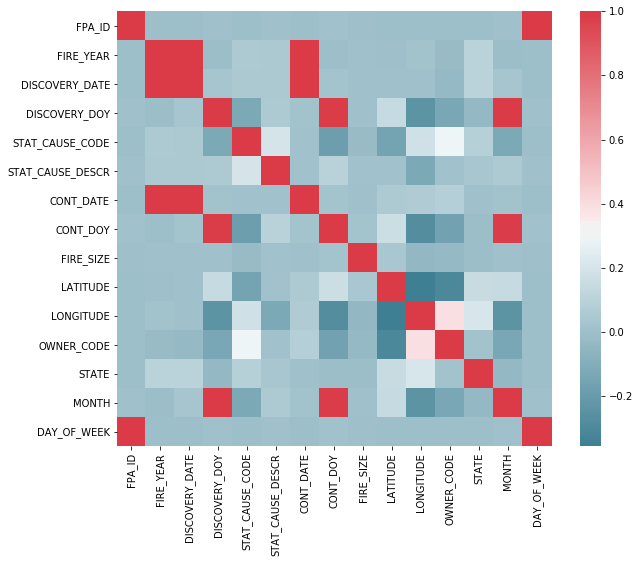

In [24]:
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

        There is interesting relation between month and latitude. Looks like season affects region wise.
        whereas the relation is weak between month and longitude.

Let us drop un-necessary columns

In [25]:
data = data.drop('DATE',axis=1)
data = data.dropna()

We will use Supervised Learning to predict Cause of fire

In [27]:
X = data.drop(['STAT_CAUSE_DESCR','FDA_ID'], axis=1).values
y = data['STAT_CAUSE_DESCR'].values
y= data.drop['FDA_ID'].values

KeyError: "['FDA_ID'] not found in axis"

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 
#Splitting 30% for Testing

In [85]:
random = ske.RandomForestClassifier(n_estimators=50)
random = random.fit(X_train, y_train)
print(random.score(X_test,y_test))

ValueError: could not convert string to float: 'FS-1510534'